In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [77]:
with open("data/lab1_points.txt") as lab1_points:
    X=np.loadtxt(lab1_points).transpose()
X

array([[-0.5, -0.5],
       [-0.5,  0.5],
       [ 0.3, -0.5],
       [-0.1,  1. ]])

In [78]:
def extend(X):
    n_samples = X.shape[0]
    return np.concatenate([np.ones((n_samples, 1)), X], axis=1)

In [79]:
with open("data/lab1_classes.txt") as lab1_classes:
    y=np.loadtxt(lab1_classes)
y

array([-1., -1.,  1.,  1.])

In [80]:
def unit_step_f(x):
    return 1 if x>=0 else -1

class Rosenblatt:    
    def fit(self, X, y, max_iter=500, delta_step=0.01):
        def predict(X):
            return np.where(X.dot(self.weights)>= 0.0, 1, -1)
        n_samples = X.shape[0]
        n_features = X.shape[1]
        self.weights = np.random.uniform(0, 0.01, (n_features+1, ))
        X = extend(X)
        for i in range(max_iter):
            errors=0
            for j in range(n_samples):
                error=y[j]-predict(X[j, :])
                if error!=0:
                    self.weights += delta_step * error * X[j, :]
                    errors += 1
            if errors == 0:
                break
        return self
    
    def predict(self, X):
        return np.where(extend(X).dot(self.weights)>= 0.0, 1, -1)

In [81]:
rosenblatt_nn=Rosenblatt().fit(X, y)

In [82]:
n_samples = X.shape[0]
rosenblatt_nn.predict(X)

array([-1, -1,  1,  1])

In [12]:
def draw_canonical_line(A,B,C, x0, x1):
    y0=(A*x0+C)/(-B)
    y1=(A*x1+C)/(-B)
    plt.plot([x0, x1], [y0, y1], color='b')

<IPython.core.display.Javascript object>


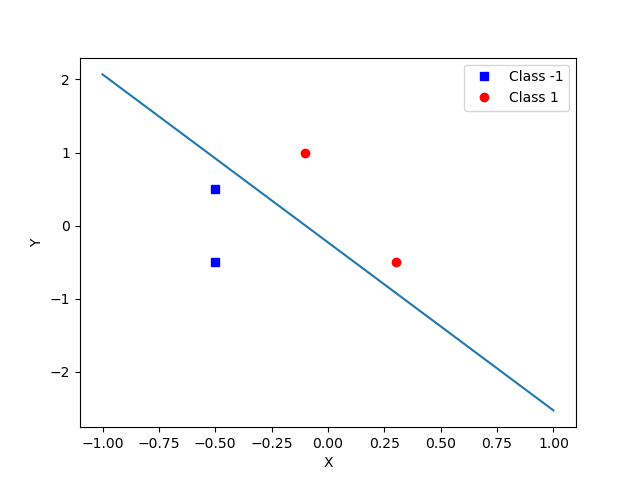

In [86]:
plt.figure()
class_min_1=X[np.where(y==-1)]
class_1=X[np.where(y==1)]
weights=rosenblatt_nn.weights
plt.plot(class_min_1[:, 0], class_min_1[:, 1], "bs", label="Class -1")
plt.plot(class_1[:, 0], class_1[:, 1], "ro", label="Class 1")
draw_canonical_line(weights[1], weights[2], weights[0], -1, 1)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [87]:
iris = datasets.load_iris()
X_iris = iris.data[:, :2]
y_iris = iris.target
y_iris[y_iris==0]=-1
X_iris=X_iris[y_iris!=2, :]
y_iris=y_iris[y_iris!=2]

In [88]:
rosenblatt_iris=Rosenblatt().fit(X_iris, y_iris)

<IPython.core.display.Javascript object>


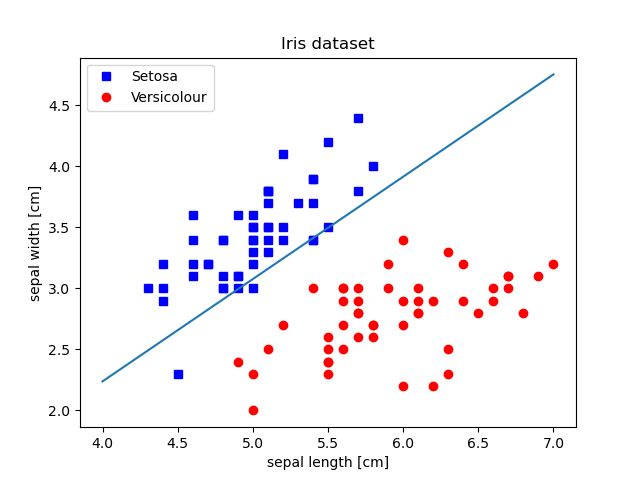

In [89]:
plt.figure()
plt.title('Iris dataset')
setosa_X=X_iris[y_iris==-1, :]
versicolour_X=X_iris[y_iris==1, :]
plt.plot(setosa_X[:, 0], setosa_X[:, 1], "bs", label="Setosa")
plt.plot(versicolour_X[:, 0], versicolour_X[:, 1], "ro", label="Versicolour")
weights=rosenblatt_iris.weights
draw_canonical_line(weights[1], weights[2], weights[0], 4, 7)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend()
plt.show()

In [90]:
X=np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y=np.array([-1,1,1,-1])

In [91]:
rosenblatt_xor=Rosenblatt().fit(X, y)

<IPython.core.display.Javascript object>


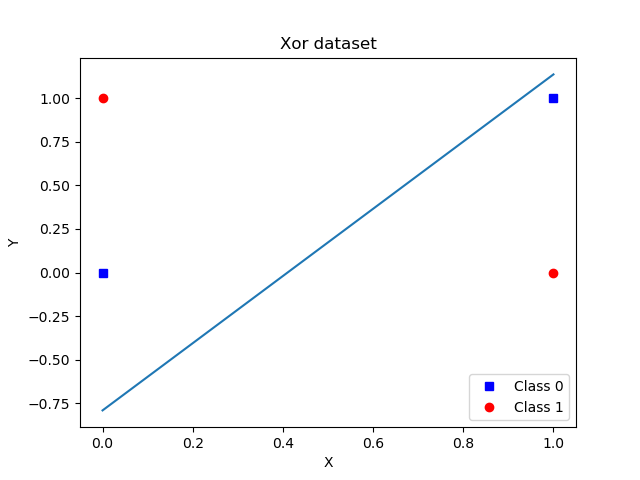

In [92]:
plt.figure()
plt.title('Xor dataset')
plt.plot(X[y==-1, 0], X[y==-1, 1], "bs", label="Class 0")
plt.plot(X[y==1, 0], X[y==1, 1], "ro", label="Class 1")
line_x=np.arange(0, 1, 0.05)
weights=rosenblatt_xor.weights
draw_canonical_line(weights[1], weights[2], weights[0], 0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


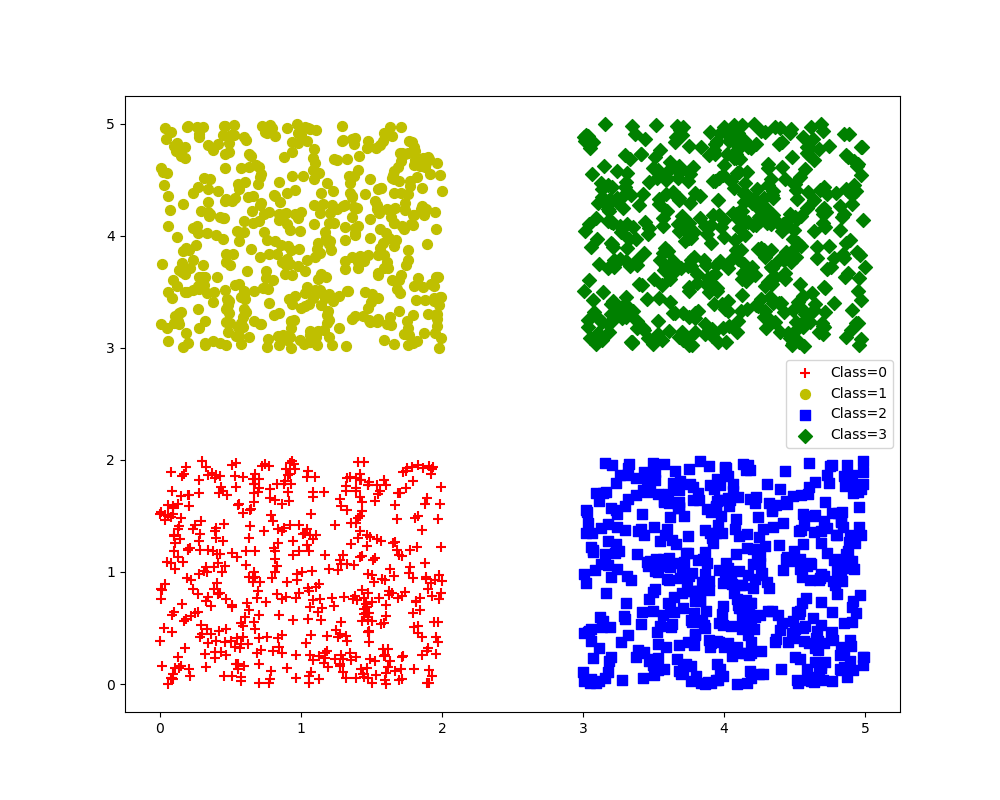

In [93]:
NUMBER_OF_POINTS=2000
X_x=np.concatenate((np.random.uniform(0,2, (int(NUMBER_OF_POINTS/2),)), np.random.uniform(3,5, (int(NUMBER_OF_POINTS/2),))), axis=0)
X_y=np.concatenate((np.random.uniform(0,2, (int(NUMBER_OF_POINTS/4),)), np.random.uniform(3,5, (int(NUMBER_OF_POINTS/4),)), np.random.uniform(0,2, (int(NUMBER_OF_POINTS/4),)), np.random.uniform(3,5, (int(NUMBER_OF_POINTS/4),))), axis=0)
X_4class=np.concatenate((X_x.reshape(X_x.shape[0], 1), X_y.reshape(X_y.shape[0], 1)), axis=1)
y_4class=np.array([0]*int(NUMBER_OF_POINTS/4)+[1]*int(NUMBER_OF_POINTS/4)+[2]*int(NUMBER_OF_POINTS/4)+[3]*int(NUMBER_OF_POINTS/4))
plt.figure(figsize=(10, 8), dpi= 100, facecolor='w', edgecolor='k')
class_0=np.where(y_4class==0)
class_1=np.where(y_4class==1)
class_2=np.where(y_4class==2)
class_3=np.where(y_4class==3)
plt.scatter(X_4class[class_0,0],X_4class[class_0, 1],c="r",marker="+",s=50, label="Class=0")
plt.scatter(X_4class[class_1,0],X_4class[class_1,1],c="y",marker="o",s=50, label="Class=1")
plt.scatter(X_4class[class_2,0],X_4class[class_2,1],c="b",marker="s",s=50, label="Class=2")
plt.scatter(X_4class[class_3,0],X_4class[class_3,1],c="g",marker="D",s=50, label="Class=3")
plt.legend()

In [94]:
def plot_history(history):
    plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
    plt.subplot(211)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.legend()
    plt.subplot(212)
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['accuracy'], label='train')
    plt.legend()
    plt.show()

In [95]:
network = models.Sequential()
network.add(layers.Dense(2, input_shape=(2,)))
network.add(layers.Dense(4, activation='softmax'))
callbacks=[EarlyStopping(monitor='accuracy', mode='max', patience=5, restore_best_weights=True)]
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
               )
train_labels = to_categorical(y_4class)
history=network.fit(X_4class, train_labels, epochs=500,  callbacks=callbacks)

Epoch 1/500
63/63 [==============================] - 0s 683us/step - loss: 2.1052 - accuracy: 0.3220
Epoch 2/500
63/63 [==============================] - 0s 683us/step - loss: 1.6400 - accuracy: 0.3500
Epoch 3/500
63/63 [==============================] - 0s 635us/step - loss: 1.3092 - accuracy: 0.3480
Epoch 4/500
63/63 [==============================] - 0s 667us/step - loss: 1.0962 - accuracy: 0.3570
Epoch 5/500
63/63 [==============================] - 0s 672us/step - loss: 0.9655 - accuracy: 0.4820
Epoch 6/500
63/63 [==============================] - 0s 889us/step - loss: 0.8789 - accuracy: 0.6115
Epoch 7/500
63/63 [==============================] - 0s 698us/step - loss: 0.8149 - accuracy: 0.7040
Epoch 8/500
63/63 [==============================] - 0s 698us/step - loss: 0.7625 - accuracy: 0.7285
Epoch 9/500
63/63 [==============================] - 0s 746us/step - loss: 0.7172 - accuracy: 0.7340
Epoch 10/500
63/63 [==============================] - 0s 778us/step - loss: 0.6769 - accura

<IPython.core.display.Javascript object>


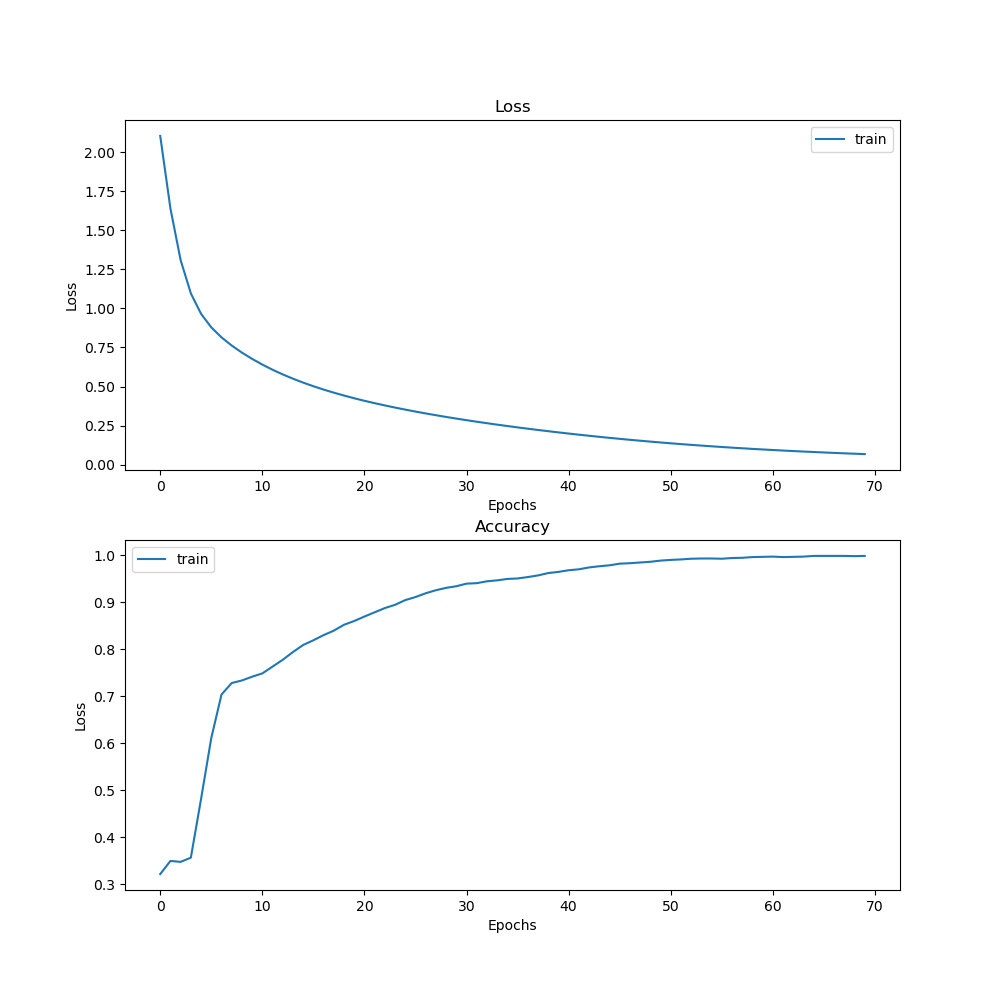

In [96]:
plot_history(history)

In [99]:
y_first=y_4class.copy()
y_first[np.where(y_first==1)]=1
y_first[np.where(y_first==3)]=1
y_first[np.where(y_first==0)]=-1
y_first[np.where(y_first==2)]=-1
rosenblatt_first_neuron=Rosenblatt().fit(X_4class, y_first)
y_second=y_4class.copy()
y_second[np.where(y_second==1)]=-1
y_second[np.where(y_second==3)]=1
y_second[np.where(y_second==0)]=-1
y_second[np.where(y_second==2)]=1
rosenblatt_second_neuron=Rosenblatt().fit(X_4class, y_second)

<IPython.core.display.Javascript object>


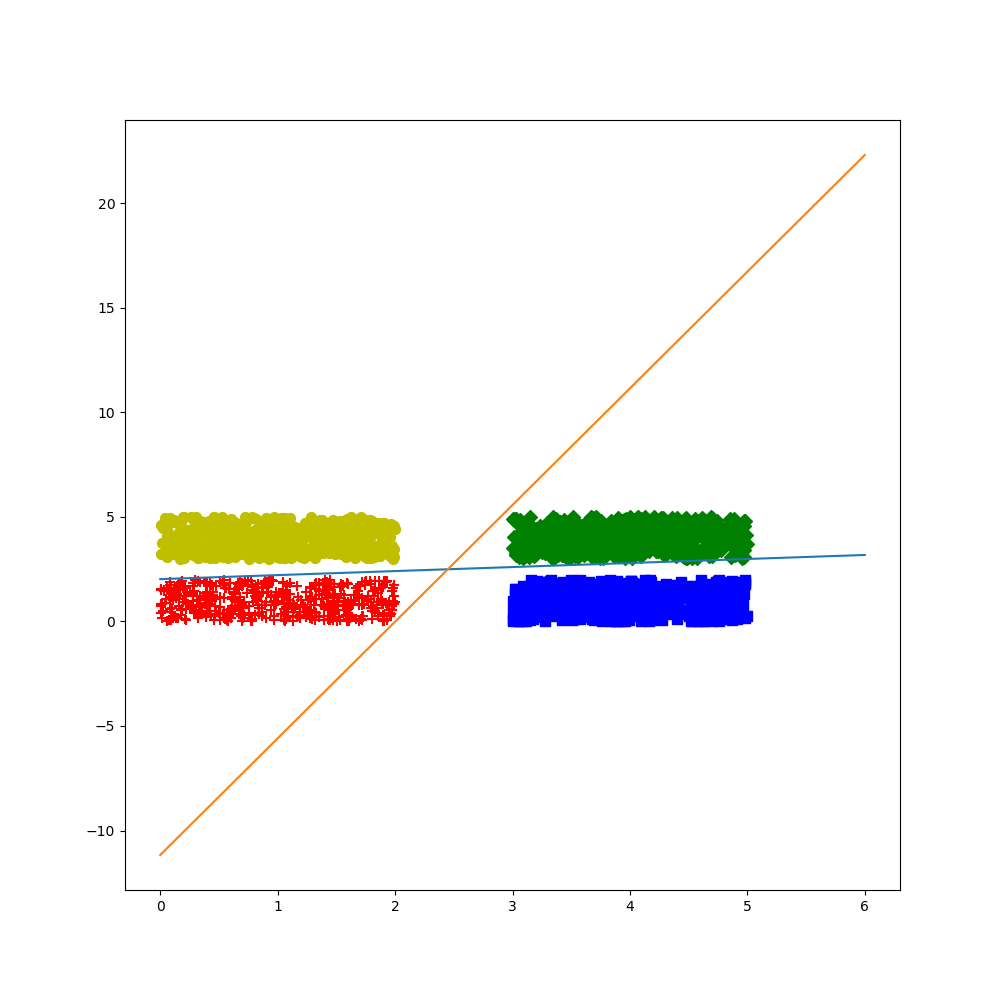

In [101]:
plt.figure(figsize=(10, 10), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(X_4class[class_0,0],X_4class[class_0, 1],c="r",marker="+",s=50, label="Class=0")
plt.scatter(X_4class[class_1,0],X_4class[class_1,1],c="y",marker="o",s=50, label="Class=1")
plt.scatter(X_4class[class_2,0],X_4class[class_2,1],c="b",marker="s",s=50, label="Class=2")
plt.scatter(X_4class[class_3,0],X_4class[class_3,1],c="g",marker="D",s=50, label="Class=3")
weights_first=rosenblatt_first_neuron.weights
draw_canonical_line(weights_first[1], weights_first[2], weights_first[0], 0, 6)
weights_second=rosenblatt_second_neuron.weights
draw_canonical_line(weights_second[1], weights_second[2], weights_second[0], 0, 6)

In [13]:
def line_1(x,y):
    return 7*x-2*y+15>=0

def line_2(x,y):
    return -x-5*y-18<=0

def line_3(x,y):
    return -x+4*y+18>=0

def line_4(x,y):
    return x+3*y+3>=0

def line_5(x,y):
    return -3*x-y+7<=0

def line_6(x,y):
    return 2*x-2*y-2>=0

def line_7(x,y):
    return -x-5*y+19>=0

def line_8(x,y):
    return 6*x+2*y-30<=0

def is_in_figure_1(x,y):
    return all(on_side_of_line(x,y) for on_side_of_line in [line_1, line_2, line_3, line_7, line_8])

def is_in_figure_2(x,y):
    return all(on_side_of_line(x,y) for on_side_of_line in [line_4, line_5, line_6, line_8])

def is_inside_figure(x,y):
    return is_in_figure_1(x,y) and not is_in_figure_2(x,y)

In [14]:
nx, ny = (100, 100)
X = np.linspace(-5, 8, nx)
Y = np.linspace(-5, 5, ny)
xv, yv = np.meshgrid(X, Y, indexing='ij')
X_train=[]
y_train=[]
for i in range(nx):
    for j in range(ny):
        X_train.append([xv[i,j], yv[i,j]])
        y_train.append(int(is_inside_figure(xv[i,j], yv[i,j])))
X_train=np.array(X_train)
y_train=np.array(y_train)

<IPython.core.display.Javascript object>


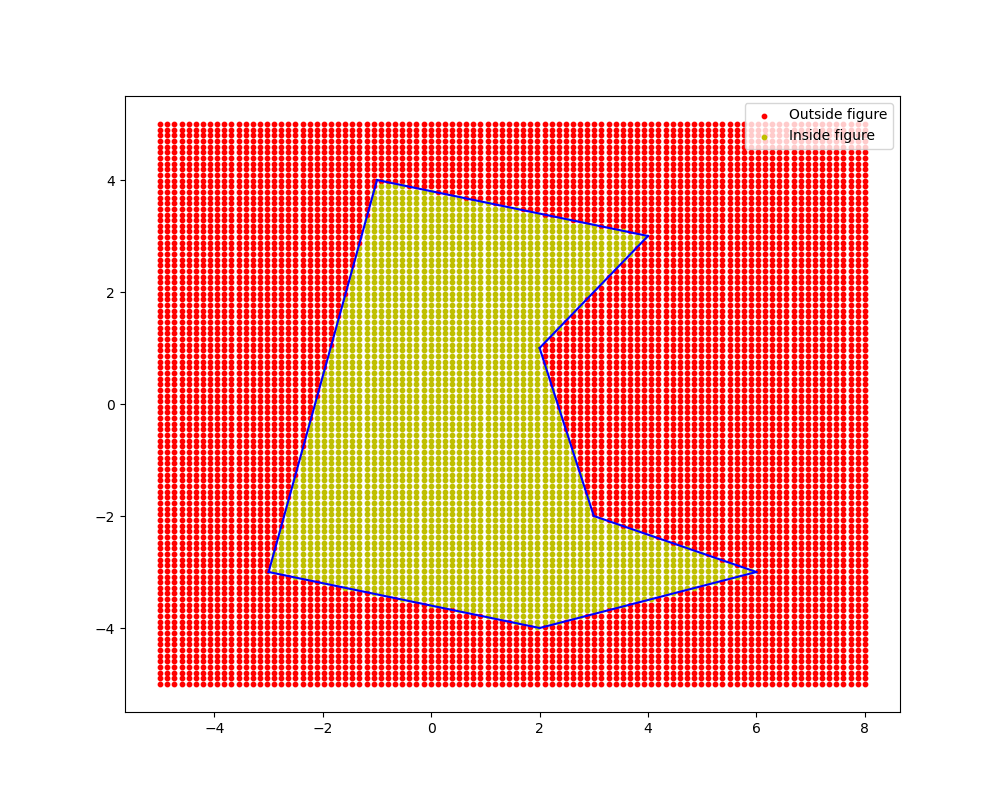

In [30]:
plt.figure(figsize=(10, 8), dpi= 100, facecolor='w', edgecolor='k')
class_0=np.where(y_train==0)
class_1=np.where(y_train==1)
plt.scatter(X_train[class_0,0],X_train[class_0, 1],c="r",s=10, label="Outside figure")
plt.scatter(X_train[class_1,0],X_train[class_1,1],c="y",marker="o",s=10, label="Inside figure")
draw_canonical_line(7, -2, 15, -3, -1)
draw_canonical_line(-1, -5, -18, -3, 2)
draw_canonical_line(-1, 4, 18, 2, 6)
draw_canonical_line(1, 3, 3, 3, 6)
draw_canonical_line(-3, -1, 7, 2, 3)
draw_canonical_line(2, -2, -2, 2, 4)
draw_canonical_line(-1, -5, 19, -1, 4)
plt.legend()

In [40]:
figure_nn = models.Sequential()
figure_nn.add(layers.Dense(7, input_shape=(2,)))
figure_nn.add(layers.Dense(7, activation='relu'))
figure_nn.add(layers.Dense(4, activation='relu'))
figure_nn.add(layers.Dense(1, activation='sigmoid'))
callbacks=[EarlyStopping(monitor='accuracy', mode='max', patience=25, restore_best_weights=True)]
figure_nn.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
               )
figure_nn.summary()
figure_nn.layers[0].set_weights((np.array([
    [7, -1, -1, 1, -3, 2, -1],
    [-2, -5, 4, 3, -1, -2, -5]
]), np.array([15, -18, 18, 3, 7, -2, 19])))
figure_nn.layers[0].trainable=False
history=figure_nn.fit(X_train, y_train, epochs=500,  callbacks=callbacks)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 7)                 21        
_________________________________________________________________
dense_61 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_62 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 5         
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
313/313 [==============================] - 0s 588us/step - loss: 2.1827 - accuracy: 0.6872
Epoch 2/500
313/313 [==============================] - 0s 560us/step - loss: 0.4562 - accuracy: 0.8126
Epoch 3/500
313/313 [==========================

313/313 [==============================] - 0s 522us/step - loss: 0.0585 - accuracy: 0.9779
Epoch 150/500
313/313 [==============================] - 0s 509us/step - loss: 0.0612 - accuracy: 0.9757
Epoch 151/500
313/313 [==============================] - 0s 494us/step - loss: 0.0593 - accuracy: 0.9759
Epoch 152/500
313/313 [==============================] - 0s 507us/step - loss: 0.0597 - accuracy: 0.9766
Epoch 153/500
313/313 [==============================] - 0s 511us/step - loss: 0.0608 - accuracy: 0.9753
Epoch 154/500
313/313 [==============================] - 0s 500us/step - loss: 0.0589 - accuracy: 0.9769
Epoch 155/500
313/313 [==============================] - 0s 499us/step - loss: 0.0593 - accuracy: 0.9757
Epoch 156/500
313/313 [==============================] - 0s 512us/step - loss: 0.0583 - accuracy: 0.9766
Epoch 157/500
313/313 [==============================] - 0s 530us/step - loss: 0.0577 - accuracy: 0.9768
Epoch 158/500
313/313 [==============================] - 0s 510us/ste

<IPython.core.display.Javascript object>


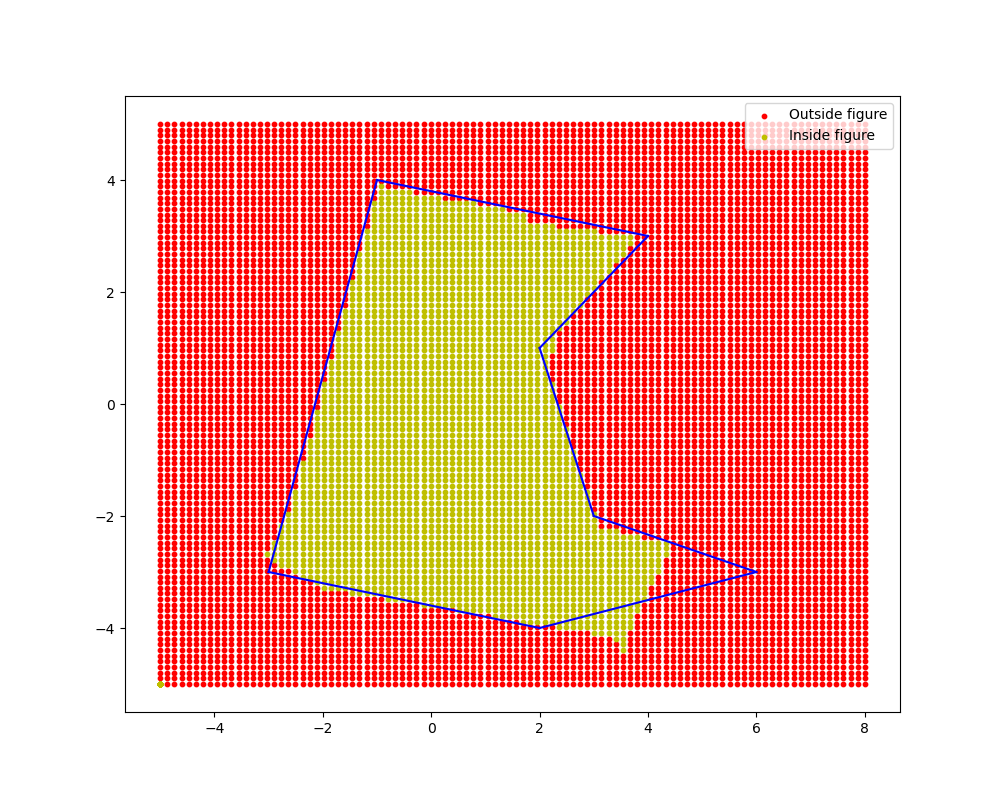

In [41]:
y_predicted=(figure_nn.predict(X_train) > 0.5).astype("int32")
plt.figure(figsize=(10, 8), dpi= 100, facecolor='w', edgecolor='k')
class_0=np.where(y_predicted==0)
class_1=np.where(y_predicted==1)
plt.scatter(X_train[class_0,0],X_train[class_0, 1],c="r",s=10, label="Outside figure")
plt.scatter(X_train[class_1,0],X_train[class_1,1],c="y",marker="o",s=10, label="Inside figure")
draw_canonical_line(7, -2, 15, -3, -1)
draw_canonical_line(-1, -5, -18, -3, 2)
draw_canonical_line(-1, 4, 18, 2, 6)
draw_canonical_line(1, 3, 3, 3, 6)
draw_canonical_line(-3, -1, 7, 2, 3)
draw_canonical_line(2, -2, -2, 2, 4)
draw_canonical_line(-1, -5, 19, -1, 4)
plt.legend()